In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, zscore

In [2]:
dataset = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
columns_with_nulls = dataset.isnull().any()
columns_with_nulls

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [6]:
print(f"Number of entries in the dataset: {len(dataset)}")
print(f"Number of unique customer IDs: {len(dataset['customerID'].unique())}")

Number of entries in the dataset: 7043
Number of unique customer IDs: 7043


In [7]:
dataset['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [8]:
dataset['Churn'].unique()

array(['No', 'Yes'], dtype=object)

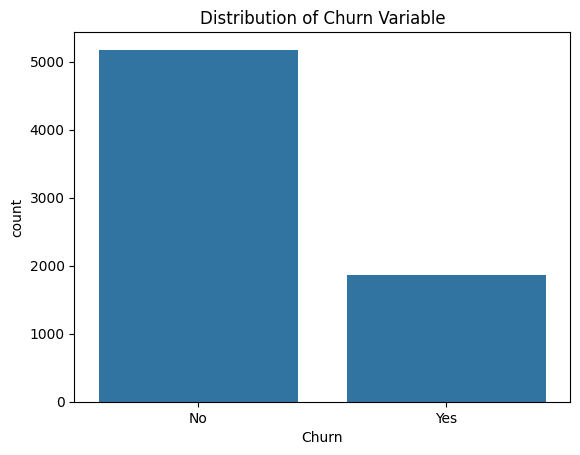

In [10]:
sns.countplot(data = dataset, x='Churn')
plt.title('Distribution of Churn Variable')
plt.show()

There is some decent amount of class imbalance to be addressed


In [11]:
print("Target Value Distribution: ")
print(dataset['Churn'].value_counts(normalize=True))

Target Value Distribution: 
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [27]:
def calculate_churn_rate(category):
    churn_rate = dataset.groupby(category)['Churn'].value_counts(normalize=True).unstack()
    churn_rate['Churn Rate'] = churn_rate['Yes']/(churn_rate['No'] + churn_rate['Yes'])
    return churn_rate

churn_gender = calculate_churn_rate('gender')
churn_partner = calculate_churn_rate('Partner')
churn_dependents = calculate_churn_rate('Dependents')
churn_contract = calculate_churn_rate('Contract')
churn_senior_citizen = calculate_churn_rate('SeniorCitizen')

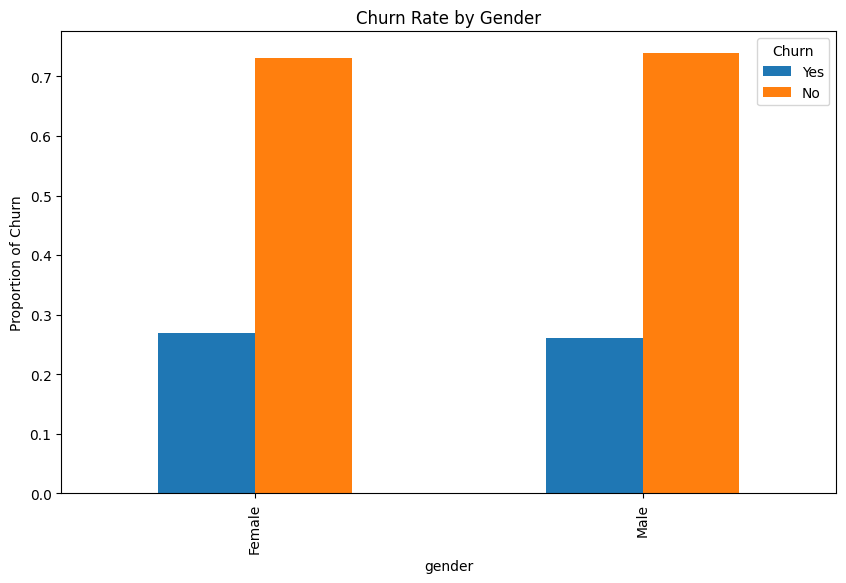

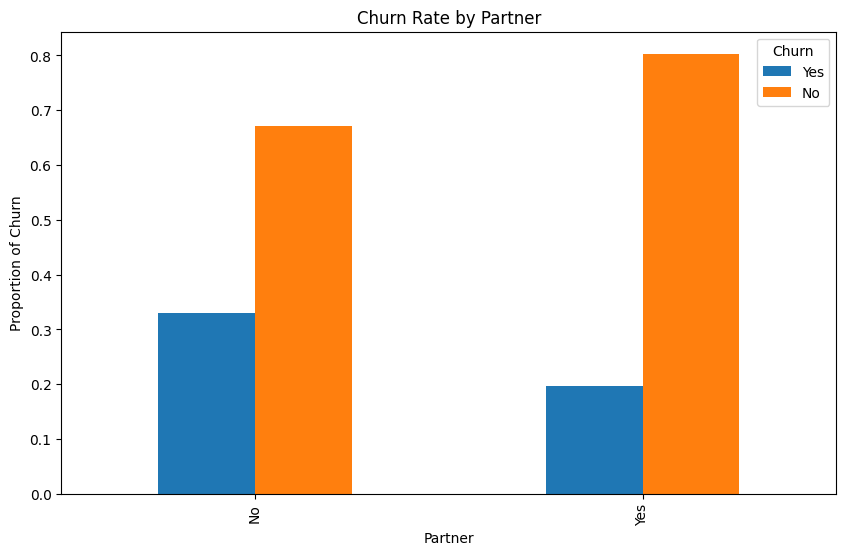

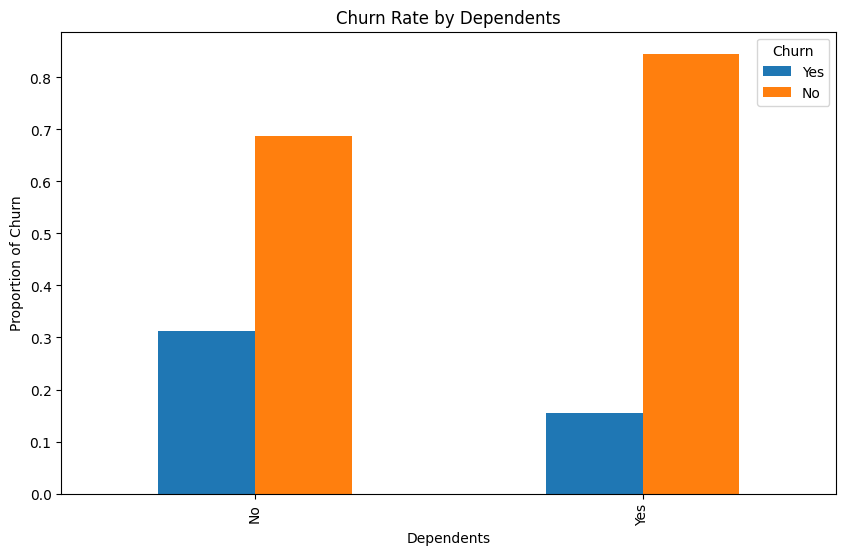

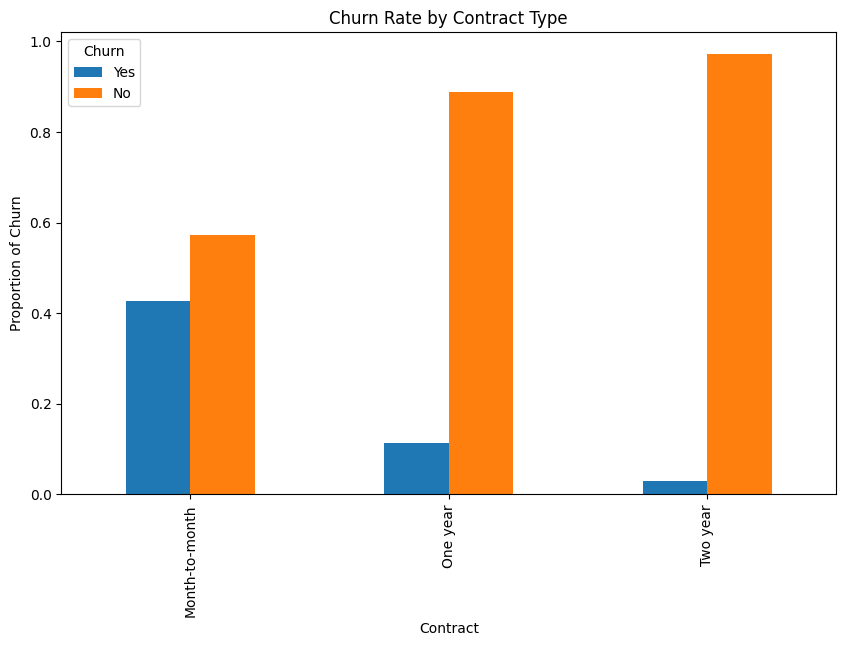

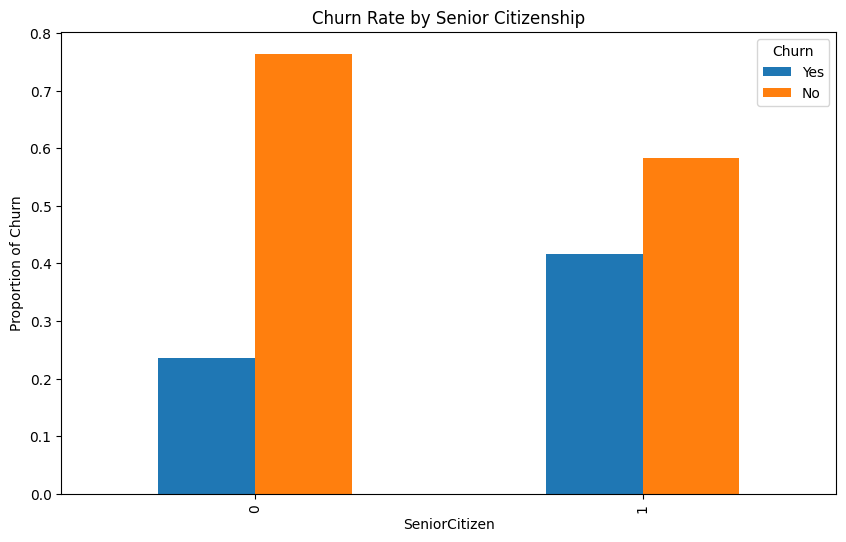

In [28]:
def plot_churn_rate(churn_rate, title):
    churn_rate[['Yes', 'No']].plot(kind='bar', stacked=False, figsize=(10, 6))
    plt.title(title)
    plt.ylabel('Proportion of Churn')
    plt.show()

plot_churn_rate(churn_gender, 'Churn Rate by Gender')
plot_churn_rate(churn_partner, 'Churn Rate by Partner')
plot_churn_rate(churn_dependents, 'Churn Rate by Dependents')
plot_churn_rate(churn_contract, 'Churn Rate by Contract Type')
plot_churn_rate(churn_senior_citizen, 'Churn Rate by Senior Citizenship')

Month-to-month contract customers have a higher churn rate (40%) compare to one year and two year contracts (less than 15%)

In [36]:
print(f"Minimum tenure: {min(dataset['tenure'])}")
print(f"Maximum tenure: {max(dataset['tenure'])}")
print(f"Mean tenure: {dataset['tenure'].mean()}")
print(f"Median tenure: {dataset['tenure'].median()}")

Minimum tenure: 0
Maximum tenure: 72
Mean tenure: 32.37114865824223
Median tenure: 29.0


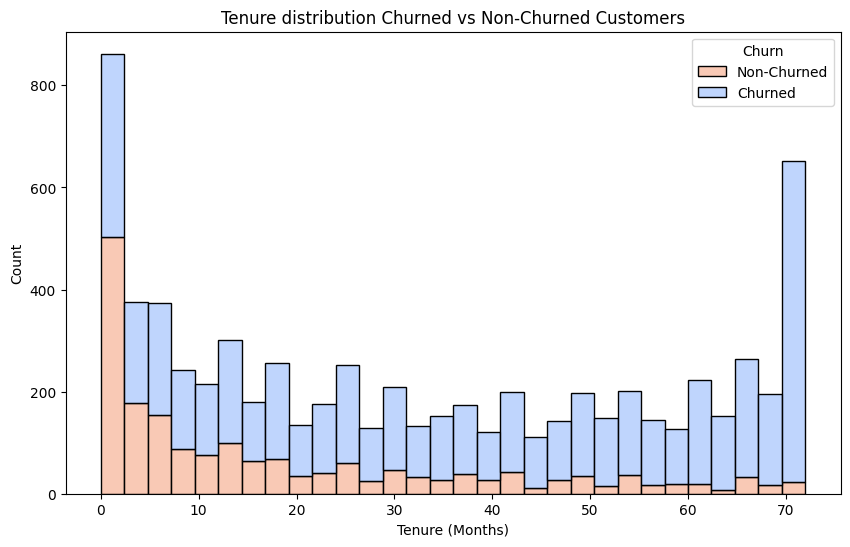

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(data = dataset,x='tenure', hue='Churn', multiple='stack', bins=30, palette='coolwarm')
plt.title('Tenure distribution Churned vs Non-Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Non-Churned', 'Churned'])
plt.show()

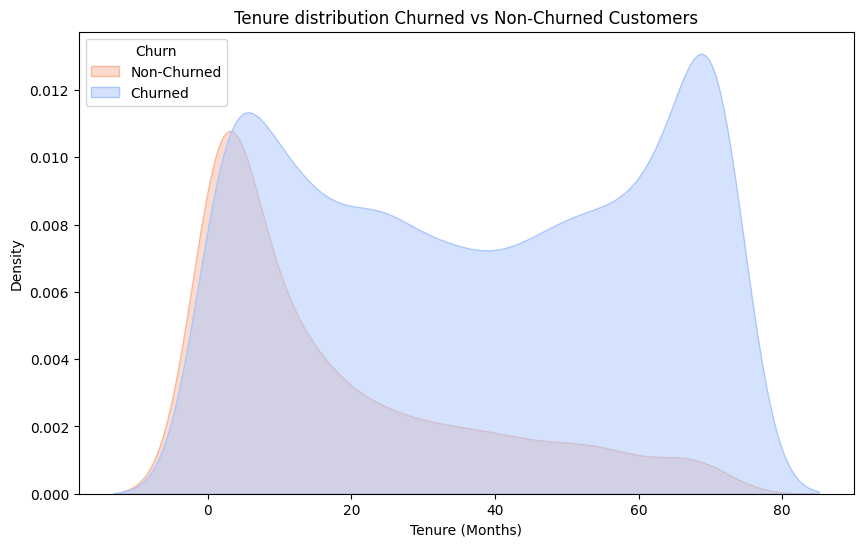

In [40]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = dataset,x='tenure', hue='Churn', fill=True , palette='coolwarm', alpha = 0.5)
plt.title('Tenure distribution Churned vs Non-Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['Non-Churned', 'Churned'])
plt.show()

In [41]:
dataset['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [45]:
dataset['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

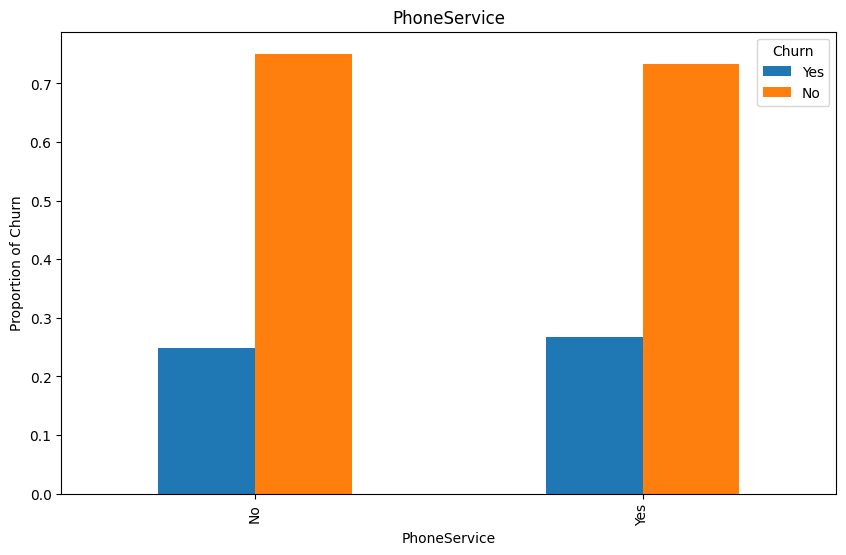

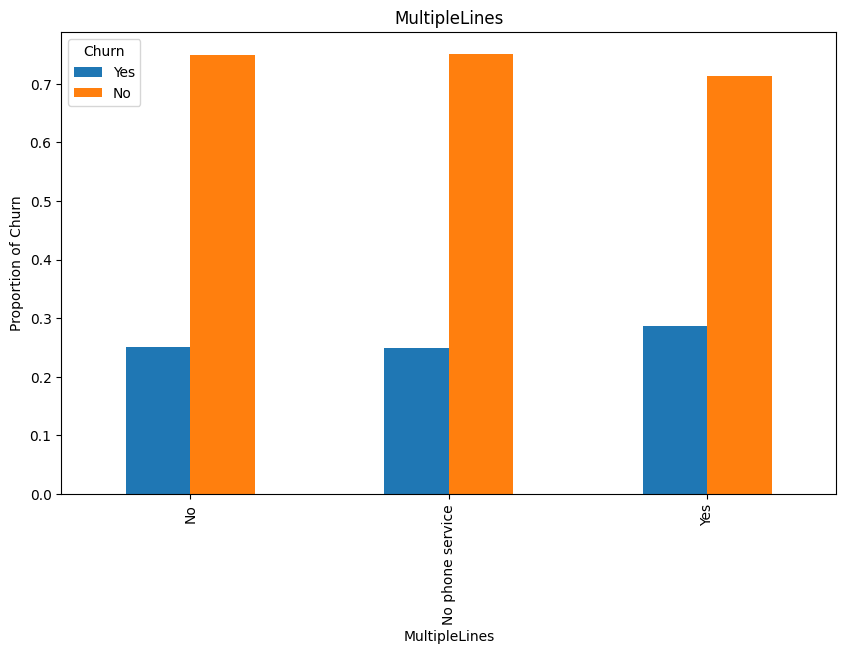

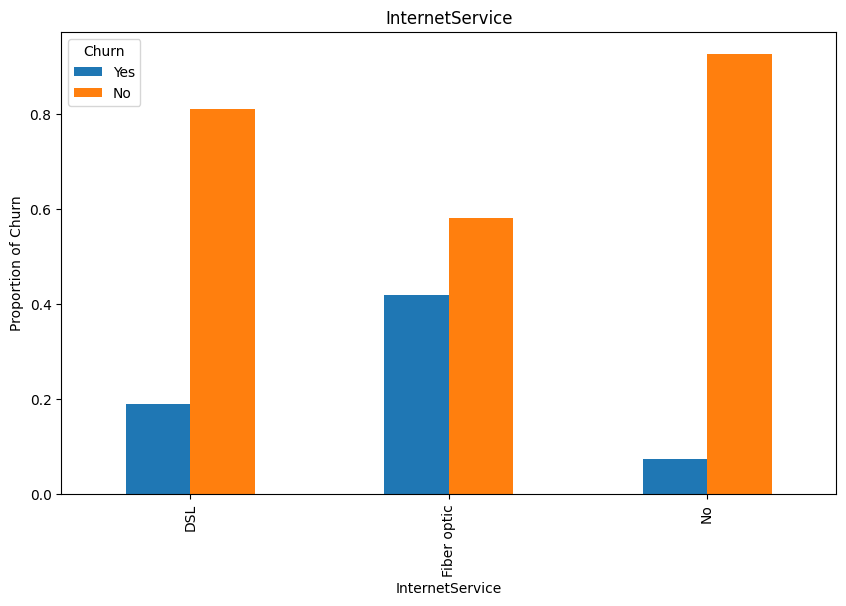

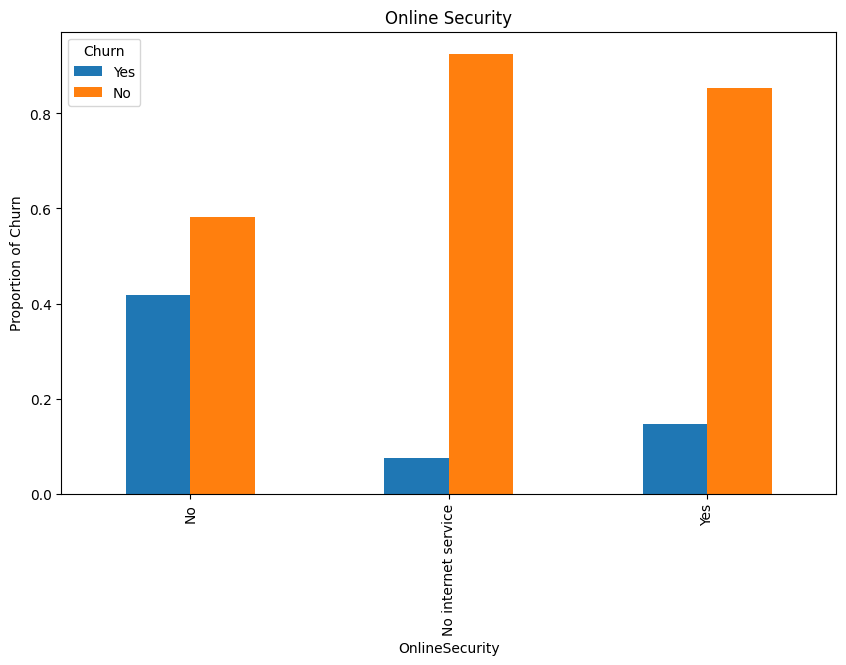

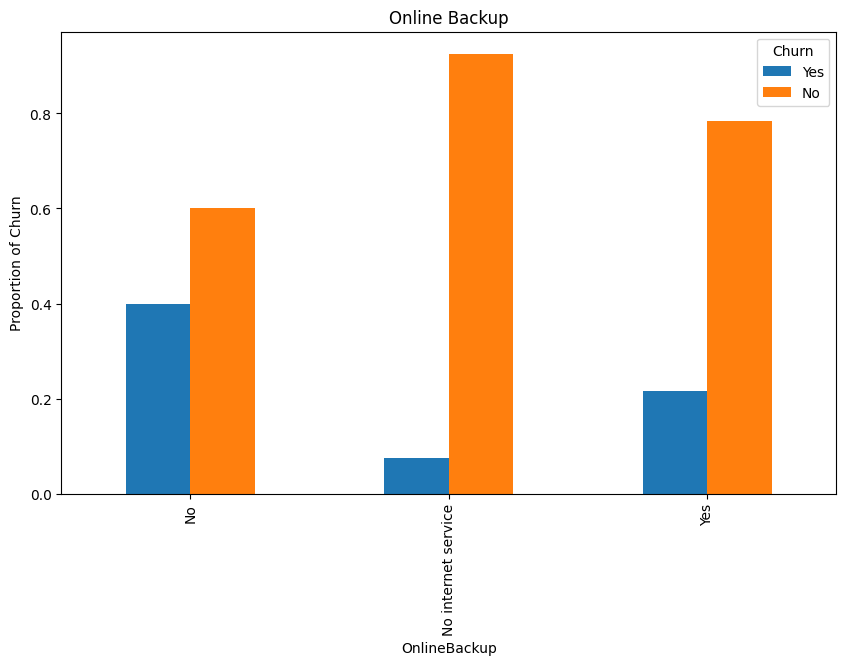

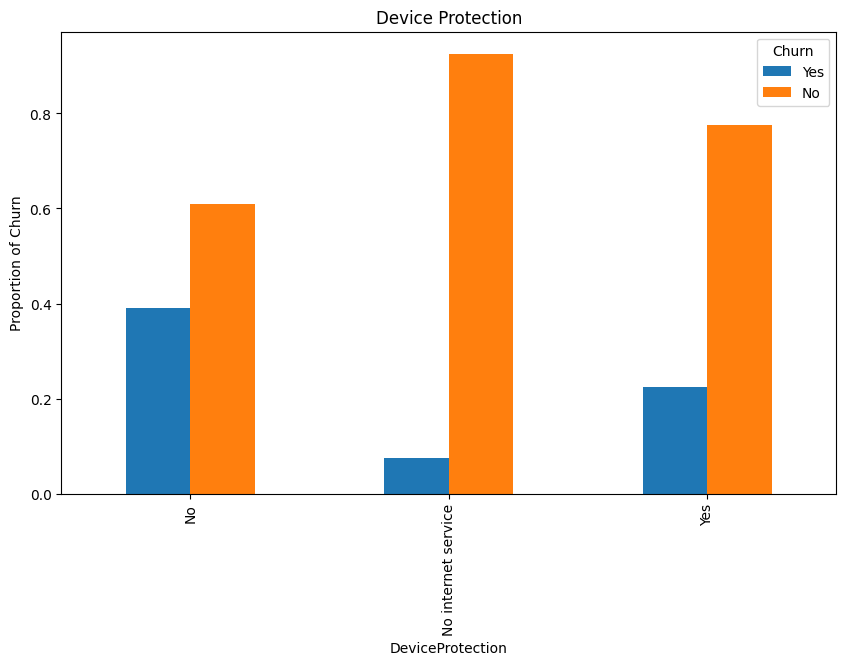

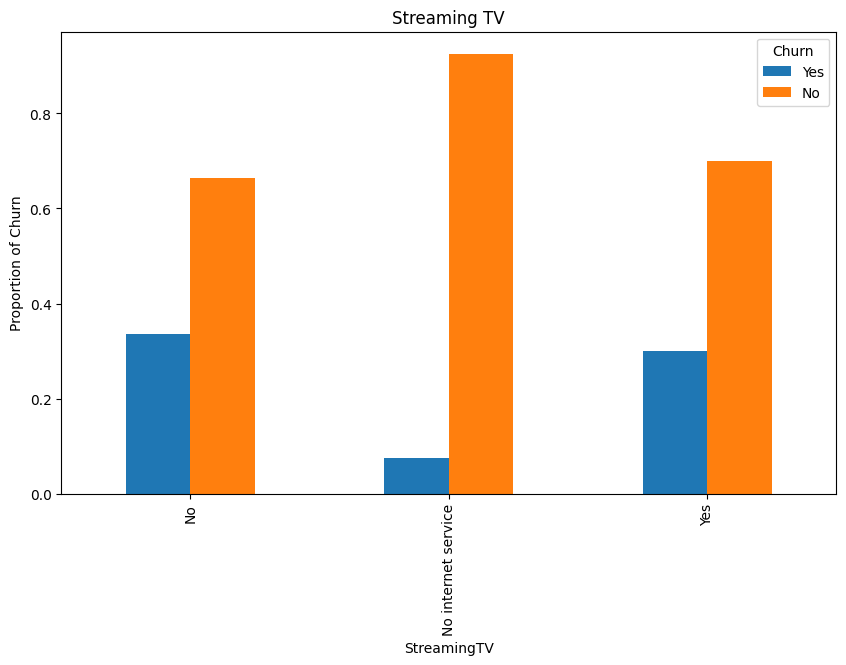

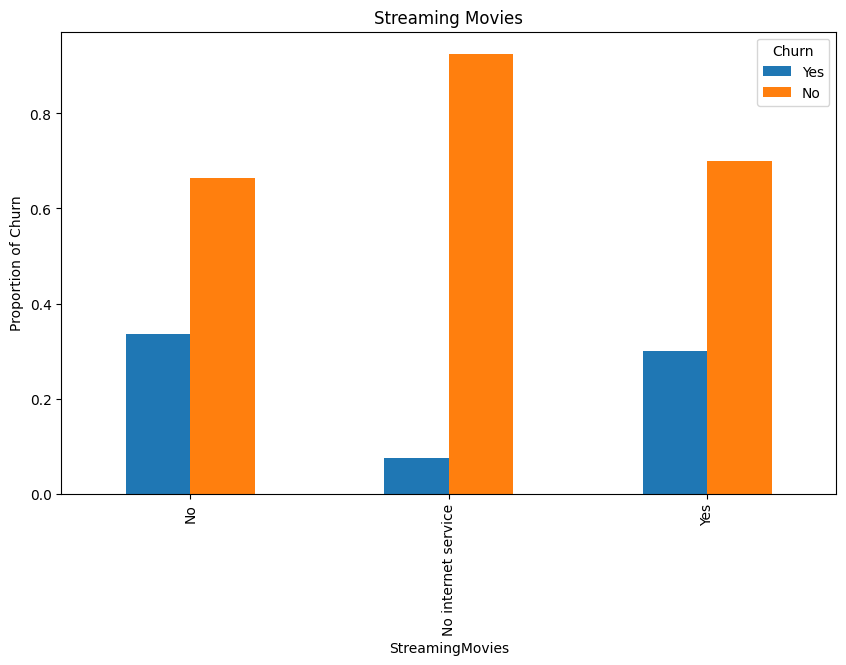

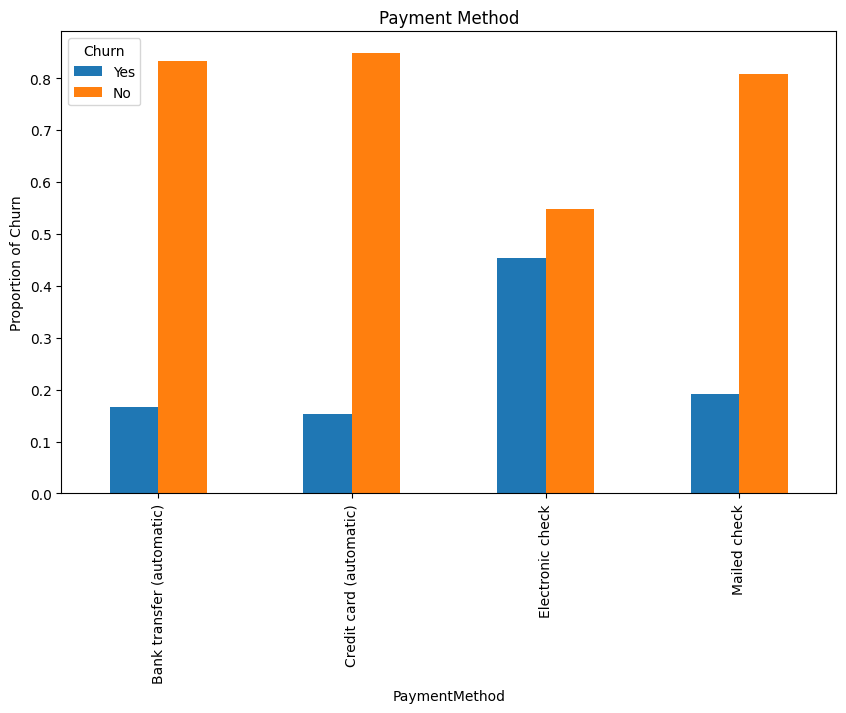

In [94]:
phone_service_churn_rate = calculate_churn_rate('PhoneService')
phone_lines_churn_rate = calculate_churn_rate('MultipleLines')
internet_service_churn_rate = calculate_churn_rate('InternetService')
online_sec_churn_rate = calculate_churn_rate('OnlineSecurity')
online_back_churn_rate = calculate_churn_rate('OnlineBackup')
device_protection_churn_rate = calculate_churn_rate('DeviceProtection')
tv_streaming_churn_rate = calculate_churn_rate('StreamingTV')
movie_streaming_churn_rate = calculate_churn_rate('StreamingMovies')
payment_method_churn_rate = calculate_churn_rate('PaymentMethod')

plot_churn_rate(phone_service_churn_rate, 'PhoneService')
plot_churn_rate(phone_lines_churn_rate, 'MultipleLines')
plot_churn_rate(internet_service_churn_rate, 'InternetService')
plot_churn_rate(online_sec_churn_rate, 'Online Security')
plot_churn_rate(online_back_churn_rate, 'Online Backup')
plot_churn_rate(device_protection_churn_rate, 'Device Protection')
plot_churn_rate(tv_streaming_churn_rate, 'Streaming TV')
plot_churn_rate(movie_streaming_churn_rate, 'Streaming Movies')
plot_churn_rate(payment_method_churn_rate, 'Payment Method')

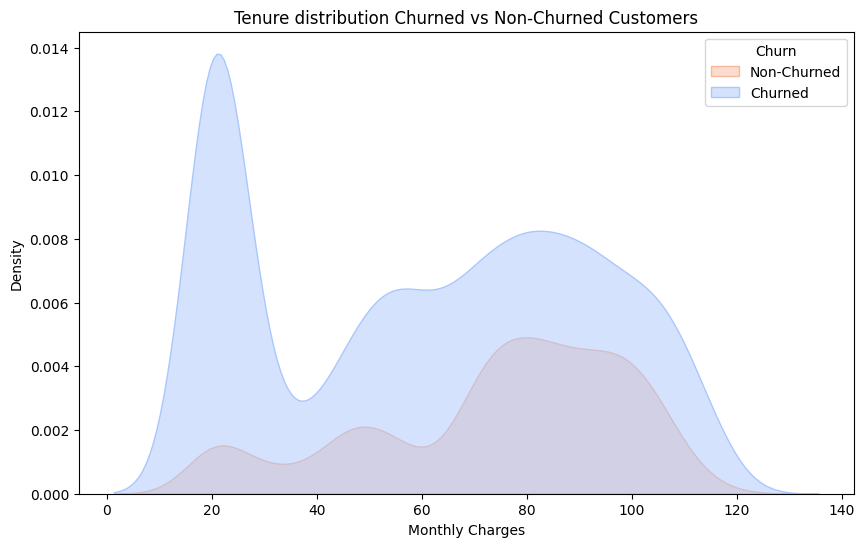

In [49]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = dataset,x='MonthlyCharges', hue='Churn', fill=True , palette='coolwarm', alpha = 0.5)
plt.title('Tenure distribution Churned vs Non-Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['Non-Churned', 'Churned'])
plt.show()

In [59]:
dataset['TotalChargesStr'] = dataset['TotalCharges'].astype(str)

In [63]:
dataset['TotalChargesStr'] = dataset['TotalChargesStr'].apply(lambda x: np.nan if x == ' ' else x)

In [75]:
dataset['ChurnNumerical'] = dataset['Churn'].apply(lambda x: 0 if x == 'No' else 1)

In [68]:
dataset['TotalChargesStr'] = dataset['TotalChargesStr'].astype(float)

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [77]:
numeric_columns = ['MonthlyCharges', 'tenure', 'TotalChargesStr']

correlation_matrix = dataset[numeric_columns].corr()

print(correlation_matrix)

                 MonthlyCharges   tenure  TotalChargesStr
MonthlyCharges         1.000000  0.24790         0.651065
tenure                 0.247900  1.00000         0.825880
TotalChargesStr        0.651065  0.82588         1.000000


In [79]:
correlation, p_value = pointbiserialr(dataset['MonthlyCharges'], dataset['ChurnNumerical'])

print(f"Point-Biserial Correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Point-Biserial Correlation: 0.193
P-value: 0.000


In [81]:
correlation, p_value = pointbiserialr(dataset['tenure'], dataset['ChurnNumerical'])

print(f"Point-Biserial Correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Point-Biserial Correlation: -0.352
P-value: 0.000


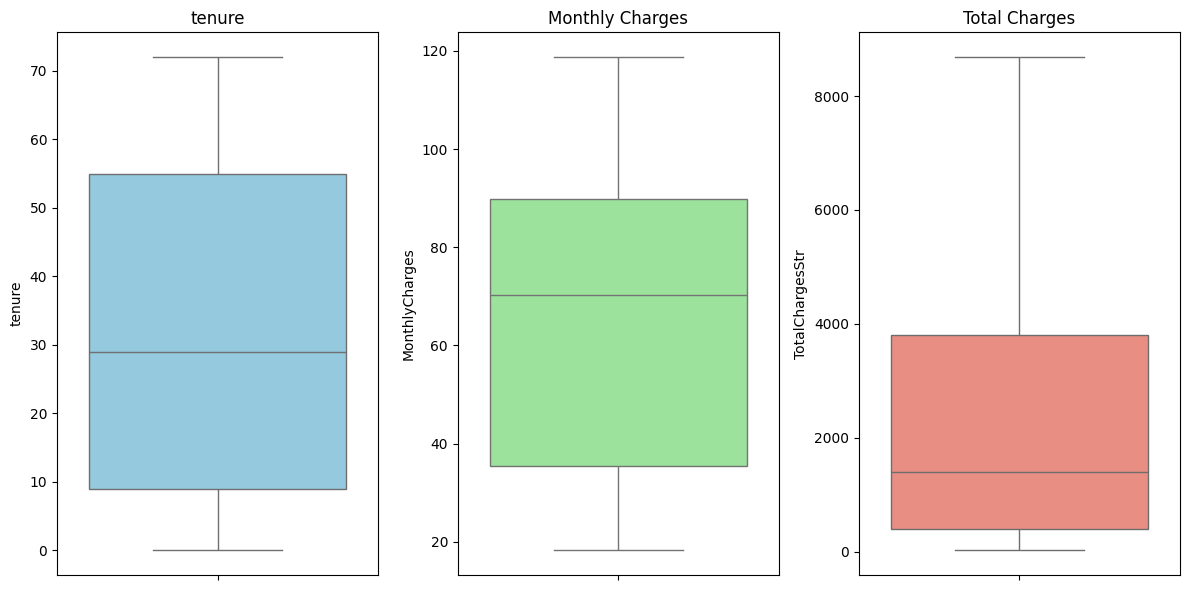

In [88]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.boxplot(y=dataset['tenure'], color = 'skyblue')
plt.title('tenure')

plt.subplot(1,3,2)
sns.boxplot(y=dataset['MonthlyCharges'], color='lightgreen')
plt.title('Monthly Charges')

plt.subplot(1, 3, 3)
sns.boxplot(y=dataset['TotalChargesStr'], color='salmon')
plt.title('Total Charges')

plt.tight_layout()
plt.show()


In [93]:
# Calculate z-scores for tenure, MonthlyCharges, and TotalCharges
dataset['tenure_zscore'] = zscore(dataset['tenure'])
dataset['MonthlyCharges_zscore'] = zscore(dataset['MonthlyCharges'])
dataset['TotalCharges_zscore'] = zscore(dataset['TotalChargesStr'])

# Identify outliers (z-score > 3 or < -3)
tenure_outliers = dataset[(dataset['tenure_zscore'] > 3) | (dataset['tenure_zscore'] < -3)]
monthly_outliers = dataset[(dataset['MonthlyCharges_zscore'] > 3) | (dataset['MonthlyCharges_zscore'] < -3)]
total_outliers = dataset[(dataset['TotalCharges_zscore'] > 3) | (dataset['TotalCharges_zscore'] < -3)]

print("Tenure Outliers:")
print(tenure_outliers[['tenure', 'tenure_zscore']])

print("\nMonthly Charges Outliers:")
print(monthly_outliers[['MonthlyCharges', 'MonthlyCharges_zscore']])

print("\nTotal Charges Outliers:")
print(total_outliers[['TotalChargesStr', 'TotalCharges_zscore']])

Tenure Outliers:
Empty DataFrame
Columns: [tenure, tenure_zscore]
Index: []

Monthly Charges Outliers:
Empty DataFrame
Columns: [MonthlyCharges, MonthlyCharges_zscore]
Index: []

Total Charges Outliers:
Empty DataFrame
Columns: [TotalChargesStr, TotalCharges_zscore]
Index: []
